In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('./datasets/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
df_clean = df[['Lot Area',
               'Street',   # Secondary, removing from first model, value split of 2044 / 7
               'Land Contour',   # Value split of 1843 / 85 / 80 / 43 
               'Neighborhood',   
               'Condition 1',
               'Condition 2',   # Secondary, removing from first model, value split of 2025 (Normal) / 26 (other values)
               'Bldg Type', 
               'House Style',
               'Overall Cond',   # Secondary variable to investigate
               'Year Built', 
               'Year Remod/Add', 
               'Roof Style',   # Secondary variable to investigate
               'Exter Cond', 
               'Foundation',   # Secondary variable to investigate
               'Bsmt Cond',   # Secondary, removing from first model, 1834 (Typicals) / 92 (Good | Excellent) / 70 (Fair | Poor)
               'BsmtFin Type 1',   # Secondary variable to investigate
               'BsmtFin Type 2',   # Secondary variable to investigate 
               'Total Bsmt SF', 
               'Heating',   # Secondary, removing from first model, value split of 2018 (GasA) / 33 (other values)
               'Central Air',   # Secondary variable to investigate   
               'Gr Liv Area', 
               'Full Bath', 
               'Half Bath', 
               'Bedroom AbvGr', 
               'Kitchen AbvGr',   # Secondary variable to investigate
               'Kitchen Qual', 
               'Fireplaces',   # Secondary variable to investigate
               'Garage Type', 
               'Garage Cars',
               'Paved Drive',   # Secondary, removing from first model, 1861 (Paved) / 39 (Partial) / 151 (Dirt/Gravel)
               'Pool QC',   # Consider removing from first model, only 9 houses with pools
               'SalePrice',
               'Yr Sold'
               ]].copy()



df_clean = df_clean.rename(columns = {'Lot Area':'lot_area',
                                      'Street':'street', 
                                      'Land Contour':'land_cont', 
                                      'Neighborhood':'neighborhood', 
                                      'Condition 1':'cond_1', 
                                      'Condition 2':'cond_2', 
                                      'Bldg Type':'bldg_type', 
                                      'House Style':'style',
                                      'Overall Cond':'overall_cond', 
                                      'Year Built':'yr_built', 
                                      'Year Remod/Add':'yr_remodeled',
                                      'Roof Style':'roof_style',
                                      'Exter Cond':'exter_cond', 
                                      'Foundation':'foundation',
                                      'Bsmt Cond':'bsmt_cond', 
                                      'BsmtFin Type 1':'bsmt_fin_1',
                                      'BsmtFin Type 2':'bsmt_fin_2', 
                                      'Total Bsmt SF':'bsmt_sf', 
                                      'Heating':'heat', 
                                      'Central Air':'cent_air',
                                      'Gr Liv Area':'gr_liv_area', 
                                      'Full Bath':'full_bath', 
                                      'Half Bath':'half_bath', 
                                      'Bedroom AbvGr':'bedrooms_gr',
                                      'Kitchen AbvGr':'kitchen',
                                      'Kitchen Qual':'kitch_qual',
                                      'Fireplaces':'fireplaces',
                                      'Garage Type':'garage_type',
                                      'Garage Cars':'garage_car_size',
                                      'Paved Drive':'paved_drive', 
                                      'Pool QC':'pool_qual',
                                      'SalePrice':'sale_price',
                                      'Yr Sold':'year_sold'
                                      })

In [6]:
# Used .describe() to check mean/min/max values and ensure all numerical columns weren't missing data

df_clean.describe()

,lot_area,overall_cond,yr_built,yr_remodeled,bsmt_sf,gr_liv_area,full_bath,half_bath,bedrooms_gr,kitchen,fireplaces,garage_car_size,sale_price,year_sold
count,2051.000000,2051.000000,2051.000000,2051.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2050.000000,2051.000000,2051.000000
mean,10065.208191,5.562165,1971.708922,1984.190151,1057.987805,1499.330083,1.577279,0.371039,2.843491,1.042906,0.590931,1.776585,181469.701609,2007.775719
std,6742.488909,1.104497,30.177889,21.036250,449.410704,500.447829,0.549279,0.501043,0.826618,0.209790,0.638516,0.764537,79258.659352,1.312014
min,1300.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000,2006.000000
25%,7500.000000,5.000000,1953.500000,1964.500000,793.000000,1129.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,129825.000000,2007.000000
50%,9430.000000,5.000000,1974.000000,1993.000000,994.500000,1444.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000,162500.000000,2008.000000
75%,11513.500000,6.000000,2001.000000,2004.000000,1318.750000,1728.500000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,214000.000000,2009.000000
max,159000.000000,9.000000,2010.000000,2010.000000,6110.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,4.000000,5.000000,611657.000000,2010.000000


In [7]:
# Check how mayn null values in each column

df_clean.isnull().sum()

lot_area              0
street                0
land_cont             0
neighborhood          0
cond_1                0
cond_2                0
bldg_type             0
style                 0
overall_cond          0
yr_built              0
yr_remodeled          0
roof_style            0
exter_cond            0
foundation            0
bsmt_cond            55
bsmt_fin_1           55
bsmt_fin_2           56
bsmt_sf               1
heat                  0
cent_air              0
gr_liv_area           0
full_bath             0
half_bath             0
bedrooms_gr           0
kitchen               0
kitch_qual            0
fireplaces            0
garage_type         113
garage_car_size       1
paved_drive           0
pool_qual          2042
sale_price            0
year_sold             0
dtype: int64

In [8]:
# Investigate bsmt_cond and bsmt_sf for null bsmt_sf entry

null_bsmt_cond = df_clean[df_clean['bsmt_cond'].isnull()]
null_bsmt_sf = df_clean[df_clean['bsmt_sf'].isnull()]
# null_bsmt_cond[['bsmt_cond', 'bsmt_sf']]
null_bsmt_sf[['bsmt_cond', 'bsmt_sf']]
df_clean.iloc[1327]

lot_area              5940
street                Pave
land_cont              Lvl
neighborhood       BrkSide
cond_1               Feedr
cond_2                Norm
bldg_type             1Fam
style               1Story
overall_cond             7
yr_built              1946
yr_remodeled          1950
roof_style           Gable
exter_cond              TA
foundation           PConc
bsmt_cond              NaN
bsmt_fin_1             NaN
bsmt_fin_2             NaN
bsmt_sf                NaN
heat                  GasA
cent_air                 Y
gr_liv_area            896
full_bath                1
half_bath                0
bedrooms_gr              2
kitchen                  1
kitch_qual              TA
fireplaces               0
garage_type         Detchd
garage_car_size          1
paved_drive              Y
pool_qual              NaN
sale_price           79000
year_sold             2008
Name: 1327, dtype: object

In [9]:
# Checking .value_counts() for columns

df_clean['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [10]:
df_clean['bsmt_cond'].sort_values()

102      Ex
1578     Ex
614      Ex
1373     Fa
306      Fa
       ... 
1859    NaN
1875    NaN
1889    NaN
1933    NaN
2010    NaN
Name: bsmt_cond, Length: 2051, dtype: object

In [11]:
# Checking datatypes for all columns

df_clean.dtypes

lot_area             int64
street              object
land_cont           object
neighborhood        object
cond_1              object
cond_2              object
bldg_type           object
style               object
overall_cond         int64
yr_built             int64
yr_remodeled         int64
roof_style          object
exter_cond          object
foundation          object
bsmt_cond           object
bsmt_fin_1          object
bsmt_fin_2          object
bsmt_sf            float64
heat                object
cent_air            object
gr_liv_area          int64
full_bath            int64
half_bath            int64
bedrooms_gr          int64
kitchen              int64
kitch_qual          object
fireplaces           int64
garage_type         object
garage_car_size    float64
paved_drive         object
pool_qual           object
sale_price           int64
year_sold            int64
dtype: object

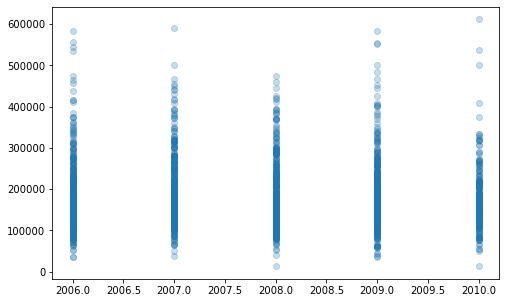

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['year_sold'], df_clean['sale_price'], alpha=.25);  # Look at Pandas boxplot

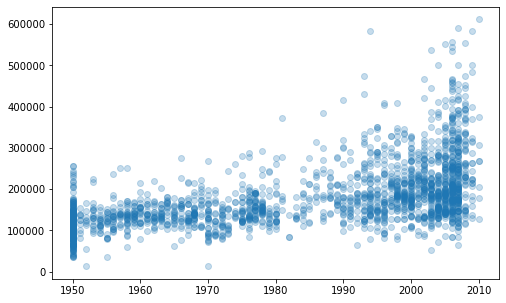

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['yr_remodeled'], df_clean['sale_price'], alpha=.25);

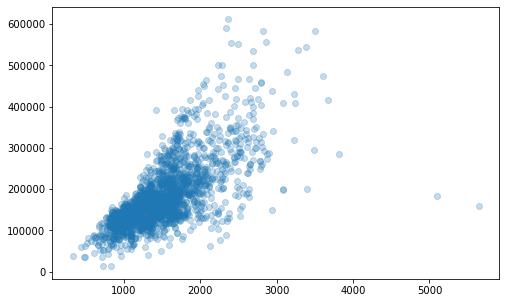

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['gr_liv_area'], df_clean['sale_price'], alpha=.25);

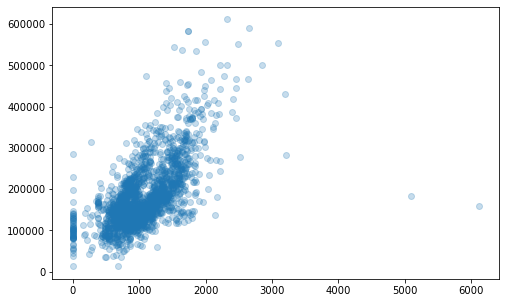

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['bsmt_sf'], df_clean['sale_price'], alpha=.25);

In [16]:
# Created has_pool column to use binary data if house has pool and disregard condition/quality

df_clean['has_pool'] = np.where(df_clean['pool_qual'].isnull(), 0, 1)
df_clean['has_pool'].value_counts()

0    2042
1       9
Name: has_pool, dtype: int64

In [17]:
# Replace null values
# https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

df_clean['bsmt_sf'] = df_clean["bsmt_sf"].fillna(0)
df_clean["bsmt_cond"] = df_clean["bsmt_cond"].fillna('None')
df_clean["bsmt_fin_1"] = df_clean["bsmt_fin_1"].fillna('None')
df_clean["bsmt_fin_2"] = df_clean["bsmt_fin_2"].fillna('None')
df_clean["garage_type"] = df_clean["garage_type"].fillna('None')

In [18]:
# Replace garage_car_size (NaN) with median value (mean and median are essentially the same)

df_clean['garage_car_size'].notnull().median()
df_clean["garage_car_size"] = df_clean["garage_car_size"].fillna(1) 

In [19]:
# Drop the pool_qual column, already converted to has_pool

df_clean.drop(columns=['pool_qual'], inplace=True)

In [20]:
# Check for remaining null values

df_clean.isnull().sum()

lot_area           0
street             0
land_cont          0
neighborhood       0
cond_1             0
cond_2             0
bldg_type          0
style              0
overall_cond       0
yr_built           0
yr_remodeled       0
roof_style         0
exter_cond         0
foundation         0
bsmt_cond          0
bsmt_fin_1         0
bsmt_fin_2         0
bsmt_sf            0
heat               0
cent_air           0
gr_liv_area        0
full_bath          0
half_bath          0
bedrooms_gr        0
kitchen            0
kitch_qual         0
fireplaces         0
garage_type        0
garage_car_size    0
paved_drive        0
sale_price         0
year_sold          0
has_pool           0
dtype: int64

In [21]:
# Enter cond_2 values of [RRNn, RRAn, RRNe, RRAe] for cond_1 values if cond_1 values [Artery, Feedr, Norm, PosN, or PosA]

for num in range(len(df_clean)):
    
    cond_tst_1a = df_clean['cond_2'][num] == 'RRAn'
    cond_tst_1b = df_clean['cond_2'][num] == 'RRAe'
    cond_tst_2a = df_clean['cond_2'][num] == 'RRNn'
    cond_tst_2b = df_clean['cond_2'][num] == 'RRNe'
    cond_tst_2c = df_clean['cond_1'][num] != 'RRAn'
    cond_tst_2d = df_clean['cond_1'][num] != 'RRAe'    
    gets_replaced = df_clean['cond_1'][num]
    does_replacing = df_clean['cond_2'][num]
     
    if cond_tst_1a or cond_tst_1b:
        df_clean.replace(gets_replaced, does_replacing, inplace=True)
    elif (cond_tst_2a or cond_tst_2b) and (cond_tst_2c or cond_tst_2d):
        df_clean.replace(gets_replaced, does_replacing, inplace=True)
        
        
df_clean.head()

,lot_area,street,land_cont,neighborhood,cond_1,cond_2,bldg_type,style,overall_cond,yr_built,...,bedrooms_gr,kitchen,kitch_qual,fireplaces,garage_type,garage_car_size,paved_drive,sale_price,year_sold,has_pool
0,13517,Pave,Lvl,Sawyer,RRAe,Norm,1Fam,2Story,8,1976,...,3,1,Gd,0,Attchd,2.0,Y,130500,2010,0
1,11492,Pave,Lvl,SawyerW,Norm,Norm,1Fam,2Story,5,1996,...,4,1,Gd,1,Attchd,2.0,Y,220000,2009,0
2,7922,Pave,Lvl,NAmes,Norm,Norm,1Fam,1Story,7,1953,...,3,1,Gd,0,Detchd,1.0,Y,109000,2010,0
3,9802,Pave,Lvl,Timber,Norm,Norm,1Fam,2Story,5,2006,...,3,1,TA,0,BuiltIn,2.0,Y,174000,2010,0
4,14235,Pave,Lvl,SawyerW,Norm,Norm,1Fam,1.5Fin,8,1900,...,3,1,TA,0,Detchd,2.0,N,138500,2010,0


In [23]:
# Check value_counts for all categorical data

# street               # DON'T USE, 2044 / 7 feature split
# land_cont            # Max: 1843 / Min: 43
# neighborhood         # Max: 310 / Min: 1, 2, 3, 6; NEED TO CHECK MAP AND GROUP SMALL NUMBER
# cond_1               # Combined RRNn/RRNe, RRAn/RRAe
# cond_2               # DO NOT USE
# bldg_type            # Max: 1700 / Min: 46
# style                # COMBINE 1.5Fin and 2.5Fin, 1.5Unf and 2.5Unf
# overall_cond         # Max: 1168 / Min: 4; COMBINE 1, 2, 3 values
# roof_style           # Max: 1619 / Min: 3; DON'T USE AT FIRST
# exter_cond           # COMBINE Gd and Ex, Po and Fa
# foundation           # Max: 926 / Min: 2, 5; CONSIDER COMBINING Wood and Stone
# bsmt_cond            # COMBINE Gd and Ex, Po and Fa
# bsmt_fin_1           # Max: 615 / Min: 102
# bsmt_fin_2           # Max: 1749 / Min: 23; DON'T USE
# bsmt_sf              # USE AS NUMERICAL
# heat                 # COMBINE NON-GAS METHODS (Wall, Grav, OthW)
# cent_air             # Y: 1910 / N: 141
# kitchen              # COMBINE 0 and 1, 2 and 3
# kitch_qual           # USE AS IS
# fireplaces           # COMBINE 2 and 3 and 4
# garage_type          # USE AS IS
# garage_car_size      # COMBINE 3 and 4 and 5
# paved_drive          # DON'T USE AT FIRST, USE AS IS
# has_pool             # 0: 2042 / 1: 9
# sale_price           # Y target



df_clean['style'].value_counts()


1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: style, dtype: int64